## Math 157: Intro to Mathematical Software
## UC San Diego, winter 2018

## Homework 7: due March 2, 2018

Please enter all answers within this notebook unless otherwise specified. As usual, don't forget to cite sources and collaborators.

Through this problem set, use the SageMath 8.1 kernel except as specified. You may find the following declarations useful:
```
preparser(False)                    # Turn off Sage preparser
import pandas as pd                 # Load pandas
import numpy as np                  # Load numpy
import matplotlib                   # Load matplotlib
import matplotlib.pyplot as plt     # Load pyplot
matplotlib.style.use('ggplot')      # Use R-style plotting in matplotlib
import seaborn as sns               # Load seaborn
```

This homework consists of 5 problems, each of equal value.

### Problem 1: Emulation of R in Python

Grading criteria: correctness of code.

Demonstrate Python analogues of the following R code blocks from the previous homework. Hints:
- The Python `statsmodels` module includes the submodule `datasets` which simulates the corresponding R package.
- The R `pairs` function can be simulated using the pandas function `scatter_matrix`.
- The seaborn function `FacetGrid` allows you to set up a grid in which each entry corresponds to a particular value of a conditioning variable. Use this, and the matplotlib scatter plot functionality, to simulate the R function `coplot`.
- The statsmodels module `mosaicplot` can simulate the R function `mosaicplot`.

In [2]:
from statsmodels import datasets
from ggplot import mtcars
%load_ext rpy2.ipython

/ext/sage/sage-8.1/local/lib/python2.7/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,


/ext/sage/sage-8.1/local/lib/python2.7/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp


/ext/sage/sage-8.1/local/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


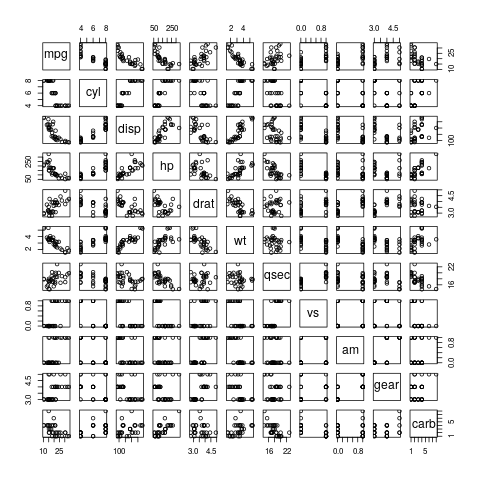

In [3]:
%%R
pairs(mtcars)

In [4]:
# Your Python equivalent goes here
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(mtcars)
plt.show()

<font color='red'>**Jupyter Kernel terminated:**</font> This might be caused by running out of memory or hitting a bug in some library (e.g., forking too many processes, trying to access invalid memory, etc.). Consider restarting or upgrading your project or running the relevant code directly in a terminal to track down the cause, as [explained here](https://github.com/sagemathinc/cocalc/wiki/KernelTerminated).

In [1]:
%%R
require(stats); require(graphics)
coplot(circumference ~ age | Tree, data = Orange, show.given = FALSE)

ERROR:root:Cell magic `%%R` not found.


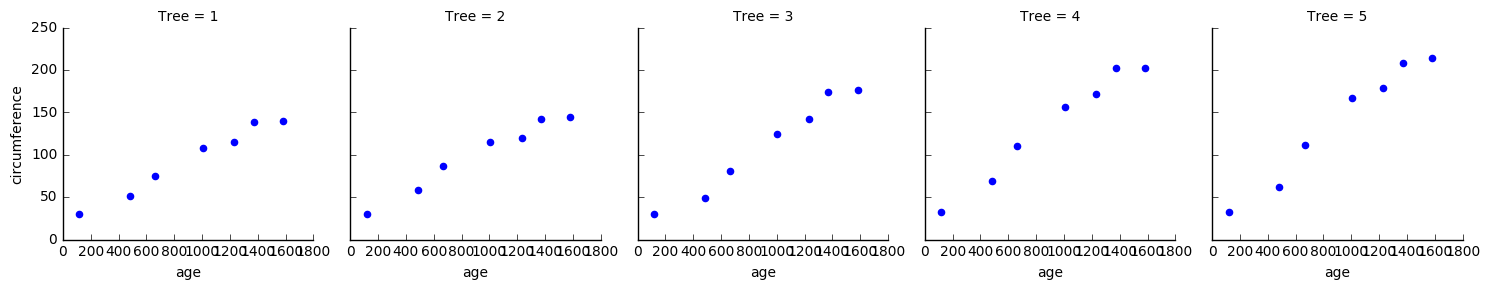

In [36]:
#Citation: https://seaborn.pydata.org/generated/seaborn.FacetGrid.html
# Your Python equivalent goes here
import seaborn as sns
import matplotlib.pyplot as plt
import rpy2.robjects as robjects
import pandas as pd

#importing orange from r to python as a pandas df
orange = robjects.r.Orange
orange = pandas2ri.ri2py(orange)
type(orange)
ora.head(
g = sns.FacetGrid(orange, col="Tree")
g = g.map(plt.scatter, "age","circumference")

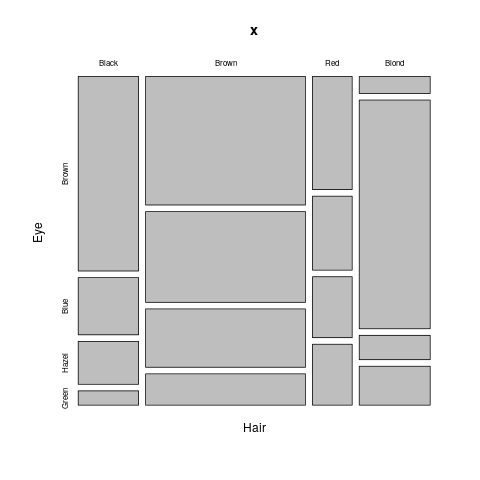

In [37]:
%%R
x <- apply(HairEyeColor, c(1, 2), sum)
x
mosaicplot(x)

(<matplotlib.figure.Figure object at 0x7f4da5e14ed0>,
 OrderedDict([(('Black', 'Blue'), (0.0, 0.0, 0.17973638663293834, 0.18335166850018333)), (('Black', 'Brown'), (0.0, 0.18665199853318665, 0.17973638663293834, 0.62339567290062325)), (('Black', 'Green'), (0.0, 0.8133480014668133, 0.17973638663293834, 0.045837917125045931)), (('Black', 'Hazel'), (0.0, 0.86248624862486256, 0.17973638663293834, 0.13751375137513747)), (('Blond', 'Blue'), (0.18466249500732257, 0.0, 0.21135667687391826, 0.73282918843065414)), (('Blond', 'Brown'), (0.18466249500732257, 0.73612951846365737, 0.21135667687391826, 0.054572386372495528)), (('Blond', 'Green'), (0.18466249500732257, 0.79400223486915622, 0.21135667687391826, 0.1247368831371326)), (('Blond', 'Hazel'), (0.18466249500732257, 0.92203944803929216, 0.21135667687391826, 0.07796055196070785)), (('Brown', 'Blue'), (0.4009452802556251, 0.0, 0.47596857941685516, 0.29079831060029077)), (('Brown', 'Brown'), (0.4009452802556251, 0.29409864063329411, 0.47596857941

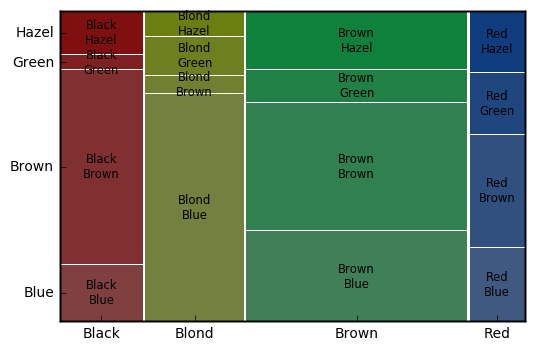

In [39]:
# Your Python equivalent goes here
preparser(False)
import statsmodels as sm
dat = sm.datasets.get_rdataset("HairEyeColor").data
from statsmodels.graphics.mosaicplot import mosaic

#mosaic(dat2, ['Hair', 'Eye'])
#mosaic(dat2);
dat = dat.groupby(['Hair','Eye']).sum()
type(dat)
mosaic(dat['Freq'])

### Problem 2: Sunspots revisited

Grading criteria: correctness of code and results.

Let `sunspots` be the sunactivity dataframe (defined below for you).

In [4]:
from statsmodels import datasets
sunspots = datasets.sunspots.load_pandas().data.set_index("YEAR")
sunspots

,SUNACTIVITY
YEAR,
1700.0,5.0
1701.0,11.0
1702.0,16.0
1703.0,23.0
1704.0,36.0
1705.0,58.0
1706.0,29.0
1707.0,20.0
1708.0,10.0


2a. For how many years was the activity $\geq 100$?

In [5]:
preparser(False)
num = sunspots[sunspots >= 100]
num.describe().iloc[0][0]

43.0

2b. Make a histogram plot of all activity from 1900 to the end of the dataset.

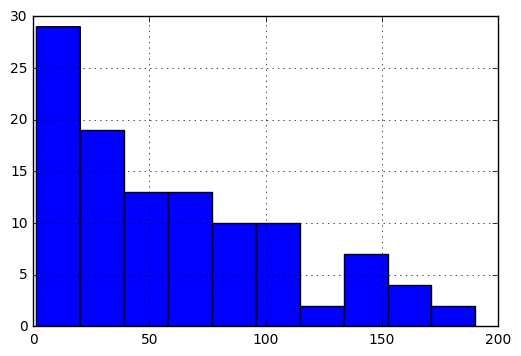

In [6]:
import matplotlib.pyplot as plt
import numpy as np
sunMod = sunspots[sunspots.index >= 1900]
sunMod['SUNACTIVITY'].hist()

2c. Which year(s) had the highest activity?

In [7]:
high = max(sunspots.iloc[:,0])
for i in range(len(sunspots.iloc[:,0])):
    if sunspots.iloc[i,0] == high:
        print sunspots.index[i]

1957.0


### Problem 3: Pivot tables

Grading criteria: correctness of code and explanations.

3a. Load the "mpg" R dataset from the Python statsmodels library into the variable `mpg`.

In [8]:
from ggplot import mpg
type(mpg)
mpg

/ext/sage/sage-8.1/local/lib/python2.7/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,


/ext/sage/sage-8.1/local/lib/python2.7/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
/ext/sage/sage-8.1/local/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
5,audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact
6,audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact
7,audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact
8,audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25,p,compact
9,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact


3b. Using the pandas `pivot_table` command, cretae a pandas DataFrame that tells you the average "cty" and "hwy" (city and highway miles per gallon) for each manufacturer.

In [9]:
#Source: http://pbpython.com/pandas-pivot-table-explained.html
import pandas as pd
import numpy as np

pd.pivot_table(mpg,index=["manufacturer"],values=["cty",'hwy'],aggfunc=[np.mean])

mean 
 
 
 
 cty 
 hwy 
 
 
 manufacturer 
 
 
 
 
 
 
 audi 
 17.611111 
 26.444444 
 
 
 chevrolet 
 15.000000 
 21.894737 
 
 
 dodge 
 13.135135 
 17.945946 
 
 
 ford 
 14.000000 
 19.360000 
 
 
 honda 
 24.444444 
 32.555556 
 
 
 hyundai 
 18.642857 
 26.857143 
 
 
 jeep 
 13.500000 
 17.625000 
 
 
 land rover 
 11.500000 
 16.500000 
 
 
 lincoln 
 11.333333 
 17.000000 
 
 
 mercury 
 13.250000 
 18.000000 
 
 
 nissan 
 18.076923 
 24.615385 
 
 
 pontiac 
 17.000000 
 26.400000 
 
 
 subaru 
 19.285714 
 25.571429 
 
 
 toyota 
 18.529412 
 24.911765 
 
 
 volkswagen 
 20.925926 
 29.222222

3c. Has the average city mileage improved from 1999 to 2008?   Has the average highway mileage improved from 1999 to 2008?

In [10]:
import pandas as pd
import numpy as np

pd.pivot_table(mpg,index=["year"],values=["cty",'hwy'],aggfunc=[np.mean])
#avg city milage has not improved, avg highway milage has improved slightly

mean 
 
 
 
 cty 
 hwy 
 
 
 year 
 
 
 
 
 
 
 1999 
 17.017094 
 23.427350 
 
 
 2008 
 16.700855 
 23.452991

3d. Create a scatterplot of pairs (displ, hwy) for all cars in 1999, and another for all cars in 2008.

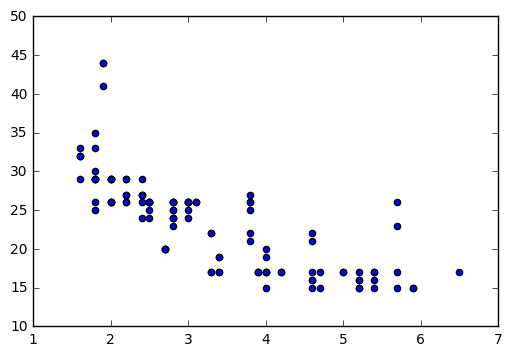

In [11]:
import matplotlib.pyplot as plt
#plt.scatter(mpg['displ'],mpg['hwy'])

plt.scatter(mpg[mpg.year == 1999]['displ'],mpg[mpg.year == 1999]['hwy'])

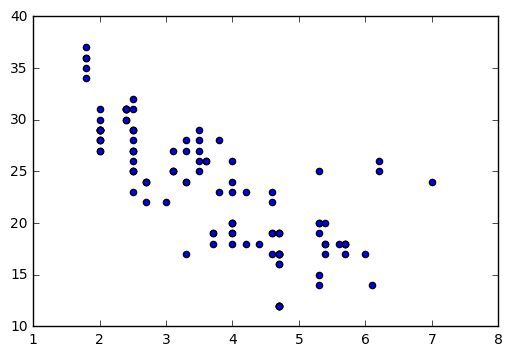

In [12]:
plt.scatter(mpg[mpg.year == 2008]['displ'],mpg[mpg.year == 2008]['hwy'])

3e. What effect does increasing displacement have on highway gas mileage?

Increasing displacement decreases the highway gas milage.

### Problem 4: Irises

Grading criteria: correctness of code and explanations.

The [iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set) is a famous example used in statistics education.

4a. Load the iris dataset into a pandas DataFrame and use the `describe` command to see some basic statistics.

In [1]:
#Source: https://pandas.pydata.org/pandas-docs/stable/r_interface.html
from rpy2.robjects import r, pandas2ri
pandas2ri.activate()
#r.data('iris')
iris = r['iris']
#type(iris)
iris.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


4b. Plot all of the sepal (length, width) pairs in a scatterplot, and the petal (length, width) pairs in another scatterplot.

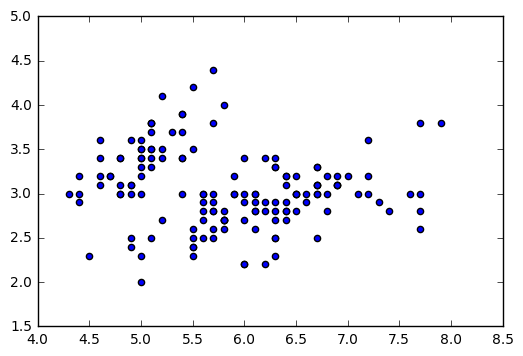

In [2]:
import matplotlib.pyplot as plt
plt.scatter(iris['Sepal.Length'],iris['Sepal.Width'])

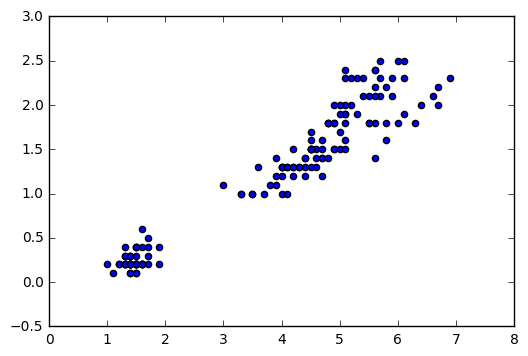

In [3]:
plt.scatter(iris['Petal.Length'],iris['Petal.Width'])

4c. Compute the average petal width for each of the "species"-categories.

In [4]:
import pandas as pd
import numpy as np

#iris
pd.pivot_table(iris,index=["Species"],values=['Petal.Width'],aggfunc=[np.mean])

,mean
,Petal.Width
Species,
setosa,0.246
versicolor,1.326
virginica,2.026


### Problem 5: Machine learning with irises

Grading criteria: correctness and relevance of code.

5a. The Wikipedia article on the iris dataset asserts:
> The use of this data set in cluster analysis however is not common, since the data set only contains two clusters with rather obvious separation.

Demonstrate this by performing a clustering computation and showing that it fails to separate the three species.

In [5]:
iris

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa
10,4.9,3.1,1.5,0.1,setosa


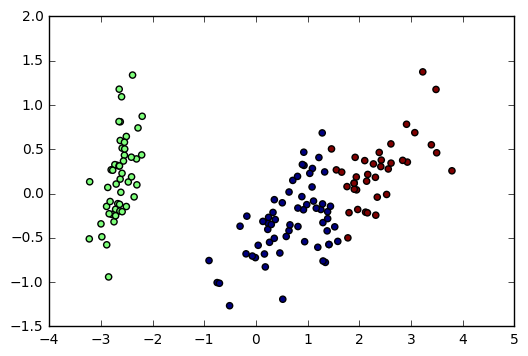

In [6]:
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=3, random_state=1)
good_columns = iris._get_numeric_data()
kmeans_model.fit(good_columns)
labels = kmeans_model.labels_

from sklearn.decomposition import PCA
pca_2 = PCA(2)
plot_columns = pca_2.fit_transform(good_columns)
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=labels)
plt.show()

5b. Use the [scikit-learn SVM classifier](http://scikit-learn.org/stable/modules/svm.html#svm-mathematical-formulation) to classify species. Use a random sample of 80% of the initial data for training and the other 20% for testing, and report the accuracy rate of your predictions.

In [7]:
preparser(False)
train = iris.sample(frac=0.8, random_state=1)
test = iris.loc[~iris.index.isin(train.index)]

from sklearn import svm
clf = svm.SVC(gamma=0.001, C=100.)

clf.fit(train.iloc[:,0:4],train.iloc[:,4]) #fitting with numerical training data & training labels
predictions = clf.predict(test.iloc[:,0:4]) #testing with numerical testing data

accuracy = 0
for i in range(len(predictions)):
    if test.iloc[i,4] == predictions[i]:
        accuracy+=1

RR(accuracy)/RR(len(predictions))

ValueError: random_state must be an integer, a numpy RandomState, or None